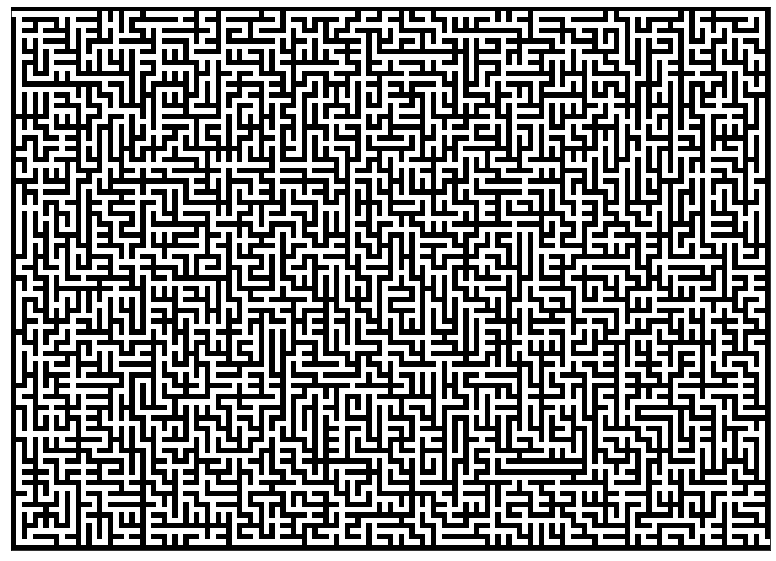

In [4]:
################################################################################
#        Maze Generation with Randomized Kruskal's Algorithm                   #
################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random

def kruskal(row,col):
    
    walldict={} #dictionary contains all walls in maze
    celldict={} #dictionary contains all value of cells in maze
    idlist={} #id's of cells
    counter=0
    
    for r in range(row):
        for c in range(col):
            
            if(c+1<col):#borders will drawn later 
                walldict[((r,c),(r,c+1))]=1 #first tuple consists of left cell
                #of wall, second tuple consists of right cell of wall
                
            if(r+1<row):#borders will drawn later
                walldict[((r,c),(r+1,c))]=1#first tuple consists of upper cell
                #of wall second tuple consists of lower cell of wall
                
            celldict[(r,c)]=counter #assign values to all cells 
            idlist[counter]=[(r,c)] #every cell has id
            counter+=1
            
    allwall=[]
    allwall=list(walldict.keys())
    
    while(len(allwall)>0):
        wall=random.choice(allwall) #to randomize 
        allwall.pop(allwall.index(wall)) # delete the used wall from list
        (cell1,cell2)=wall
        id1=celldict[cell1]
        id2=celldict[cell2]
        
        if id1<id2: #compare the values of cells
            walldict[wall]=0 # id id1 smaller than id2, remove wall
            #(between cell1-cell2) from maze
            for cell in idlist[id2]: #repeat for each cell in idList[id2]
                idlist[id1].append(cell) #add cell to idList[id1]
                celldict[cell]=id1 #new value of cell is value of id1
            idlist[id2]=[] #set idlist[id2] as empty
        #The algorithm finishes when all cell values are equal. This value is
            #smallest value of cells( it is zero here) 

    Z = np.zeros((2*row+1, 2*col+1), dtype=bool) # zero matrix for board
    # Fill borders
    Z[0,:] = Z[-1,:] = 1
    Z[:,0] = Z[:,-1] = 1

    #Display settings
    for keys in walldict.keys():
        
        ((a,b),(c,d))=keys 
        Z[2*a,2*b]=1 #walls set as cell, so the size of board is double of the
        #cell size 
        
        if walldict[keys]==1:
            Z[a+c+1,b+d+1]=1 #walls

        else:
            Z[a+c+1,b+d+1]=0 #path

    Z[1,0]=0 #start point of maze
    Z[2*row-2,2*col-2]=1
    Z[2*row-1,2*col]=0 #destination
    return Z

row=50
col=70
 
plt.figure(figsize=(15,10))
plt.imshow(kruskal(row,col),cmap=plt.cm.binary,interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()


#This algorihm requires storage proportional to the size of the entire maze.
#It generates perfect maze that always has a solution.

